In [2]:
from graphviz import Digraph

In [6]:
class Value:

    def __init__(self, data, children = (), op='') -> None:
        self.data = data
        self._prev = set(children)
        self._op = op

    def __repr__(self):
        return f"Value(data({self.data})"
    
    def __add__(self,other):
        out = Value(self.data + other.data, children=(self,other),op='+')
        return out
    

    def __mul__(self,other):
        out = Value(self.data * other.data, children=(self,other),op='*')
        return out
        

In [17]:
# Function to collect all nodes and edges
def trace(root):
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges

def draw_dot(root):

    dot = Digraph(format ='svg', graph_attr={'rankdir':'LR'})

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        dot.node(name= uid, label= "{data %.4f}" %(n.data, ), shape ='record')

        if n._op:
            dot.node(name= uid + n._op, label= n._op)
            dot.edge(uid + n._op, uid)


    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2))+ n2._op)

    return dot


In [18]:
a = Value(2)
b = Value(-3)
c =  Value(10)
d = a*b + c
d

Value(data(4)

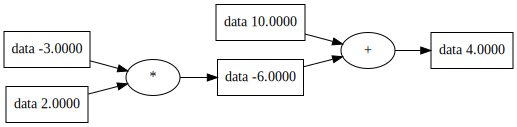

In [19]:
draw_dot(d)